#                                     Precision/Recall Tradeoff

In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
lg = LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=9,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)

## Import MNIST Data 

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [5]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
xtrain = mnist.data[:6000]

In [7]:
ytrain = mnist.target[:6000]

In [8]:
xtest = mnist.data[6000:7500]
ytest = mnist.target[6000:7500]

In [9]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((6000, 784), (1500, 784), (6000,), (1500,))

In [10]:
ytest

array(['6', '0', '1', ..., '3', '5', '0'], dtype=object)

In [11]:
ytrain

array(['5', '0', '4', ..., '8', '6', '9'], dtype=object)

## Verify the Data set

In [12]:
temp = xtrain[0]

In [13]:
temp = temp.reshape(28,28)

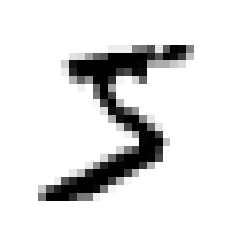

In [14]:
plt.imshow(temp, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [15]:
ytrain[0]

'5'

## Let's make Binary classfication

In [16]:
ytrain = ytrain.astype(np.uint8) ## Convert the String into Int
ytest = ytest.astype(np.uint8)

In [17]:
ytrain_for_5 = (ytrain == 5) # True for all 5s, False for all other digits.
ytest_for_5 = (ytest == 5)

In [18]:
ytrain_for_5, ytest_for_5

(array([ True, False, False, ..., False, False, False]),
 array([False, False, False, ..., False,  True, False]))

In [19]:
lg.fit(xtrain,ytrain_for_5)

C:\Users\175045\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=9, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
ypredict = lg.predict(xtest)

In [21]:
yprob = lg.predict_proba(xtest)

In [22]:
yprob

array([[1.00000000e+000, 1.11889386e-040],
       [1.00000000e+000, 1.43884011e-120],
       [1.00000000e+000, 2.52912838e-041],
       ...,
       [1.00000000e+000, 2.24887830e-014],
       [1.06512577e-011, 1.00000000e+000],
       [1.00000000e+000, 9.53555938e-026]])

As we know, we can't alter the Threshold directly but we can achieve this using Decision vlaue calclulated by Decision Function

In [23]:
ys = lg.decision_function(xtest)

In [24]:
ys

array([ -91.99106315, -275.94637385,  -93.47811408, ...,  -31.42575974,
         25.26534442,  -57.61218451])

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
conM = confusion_matrix(
    ytest_for_5,
    ypredict,
    labels=None,
    sample_weight=None,
    normalize=None,
)


In [27]:
conM

array([[1310,   41],
       [  25,  124]], dtype=int64)

In [28]:
from sklearn.metrics import precision_score, recall_score

In [29]:
pr = precision_score(
    ytest_for_5,
    ypredict,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
re = recall_score(
    ytest_for_5,
    ypredict,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)

In [30]:
pr, re

(0.7515151515151515, 0.8322147651006712)

Let's use threshold as zero and verify the same, Bydefault threshold is Zero, let's verify that

In [31]:
threshold = 0

In [32]:
yscore = (ys >= threshold)

In [33]:
precision_score(ytest_for_5, yscore), recall_score(ytest_for_5, yscore)

(0.7515151515151515, 0.8322147651006712)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(ypredict, yscore)

1.0

# Let's plot the Precision and Recall vs Threshold graph

Note: Below implementation is restricted to the binary classification task.

In [36]:
from sklearn.metrics import precision_recall_curve

In [37]:
precision, recall, thresholds = precision_recall_curve(
    ytest_for_5,
    ys,
    pos_label=None,
    sample_weight=None,
)

In [38]:
precision, recall, thresholds

(array([0.10198494, 0.10136986, 0.10143934, ..., 1.        , 1.        ,
        1.        ]),
 array([1.        , 0.99328859, 0.99328859, ..., 0.01342282, 0.00671141,
        0.        ]),
 array([-266.14486572, -264.900542  , -264.01065713, ...,  156.1714513 ,
         160.07551708,  193.97807044]))

In [39]:
precision.shape, recall.shape, thresholds.shape

((1462,), (1462,), (1461,))

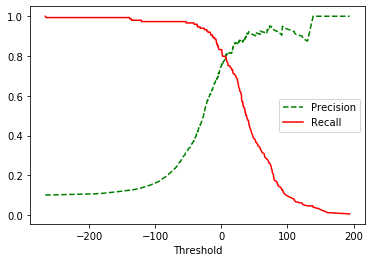

In [40]:
plt.plot(thresholds, precision[:-1], "g--", label="Precision")
plt.plot(thresholds, recall[:-1], "r-", label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.show()

# Let's plot the Precision Vs Recall

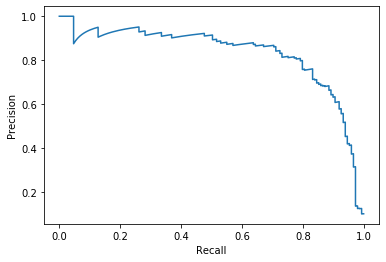

In [41]:
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# When you need Precision to be high

In [42]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve( ytest_for_5,ys)

In [43]:
threshold_90_precision = thresholds[np.argmax(precision >= 0.90)]

In [44]:
threshold_90_precision

37.464704921511384

In [45]:
ys = lg.decision_function(xtest)

In [46]:
yscore = (ys >= threshold_90_precision)

In [47]:
precision_score(ytest_for_5, yscore)

0.9036144578313253

In [48]:
recall_score(ytest_for_5, yscore)

0.5033557046979866

# When you need Recall to be high

In [49]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve( ytest_for_5,ys)

In [50]:
thr_90_recall = thresholds[np.argmin(recall >= 0.90)]

In [51]:
yscore = (ys >= thr_90_recall)

In [52]:
recall_score(ytest_for_5, yscore)

0.8993288590604027

In [53]:
print("Thanks for watching. Like and Subscribe my channel")

Thanks for watching. Like and Subscribe my channel


My YouTube Channel Link: https://www.youtube.com/channel/UCeBUYcRJ2LDIhKxZvdqWG5g?view_as=subscriber